<a href="https://colab.research.google.com/github/AbrildaRocha/TP_Modelos_Predictivos/blob/main/CHONAFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Final: Redes Neuronales Convolucionales en TensorFlow**
da Rocha Abril - Monzon Borioli Paloma

Nuestro objetivo es la clasificacion de shoes jasjahs.

dataset:https://www.kaggle.com/datasets/utkarshsaxenadn/shoes-classification-dataset-13k-images/code

## _Conflicto a Resolver_

Nuestro dataset cuenta con cierta cantidad de imágenes de diferentes tipos de zapatos, los cuales se encuentran divididos por un sistema de clases. Nuestro modelo debe discernir entre dichos zapatos y así ser capaz de diferenciarlos, es decir, debe clasificarlos.

### _Librerías_

In [21]:
!pip install tensorflow opencv-python matplotlib

In [28]:
pip install keras-visualizer

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras_visualizer import visualizer

In [ ]:
# creamos carpetas para así ubicar nuestras imágenes

### *Clases*

In [ ]:
classes = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']

### *Directorios*

In [ ]:
data_dir = '/content/data'
os.makedirs(data_dir, exist_ok=True)

train_dir = '/content/data/train'
os.makedirs(train_dir, exist_ok=True)

val_dir = '/content/data/validation'
os.makedirs(val_dir, exist_ok=True)

test_dir = '/content/data/test'
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# carpetas para cada clase en el conjunto de entrenamiento
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

# carpetas para cada clase en el conjunto de validacion
for class_name in classes:
    class_dir = os.path.join(val_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)


# carpetas para cada clase en el conjunto de testeo
for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

### *Distribución de Imágenes en cada Clase*

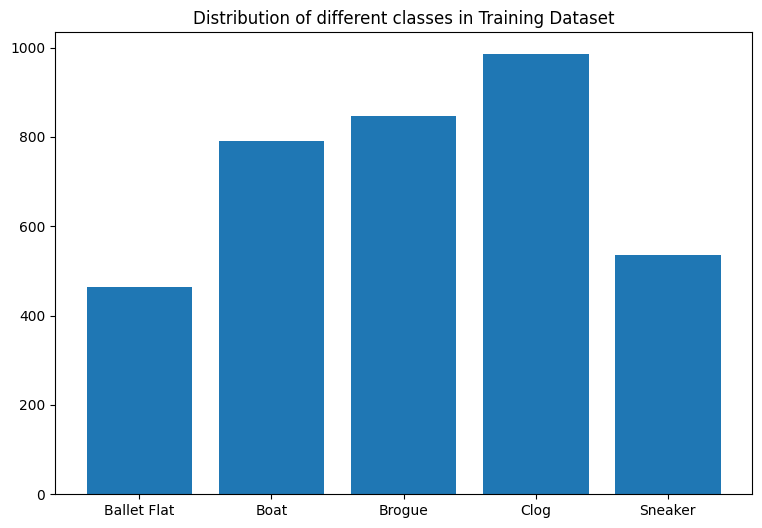

In [7]:
image_folder = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

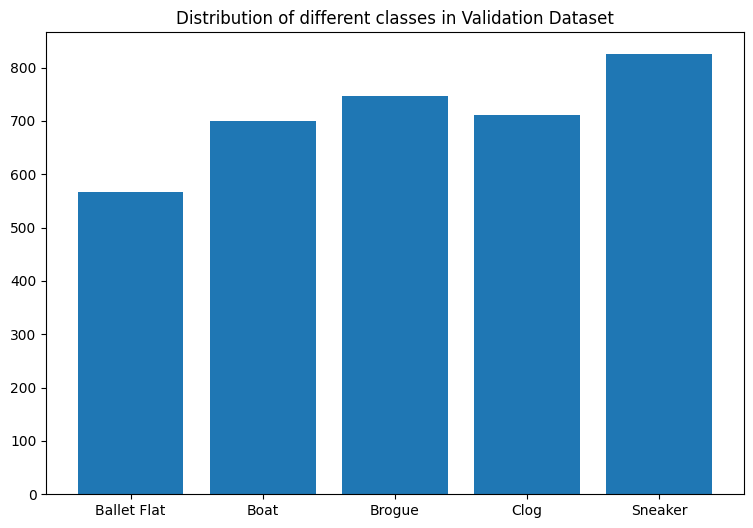

In [8]:
image_folder = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

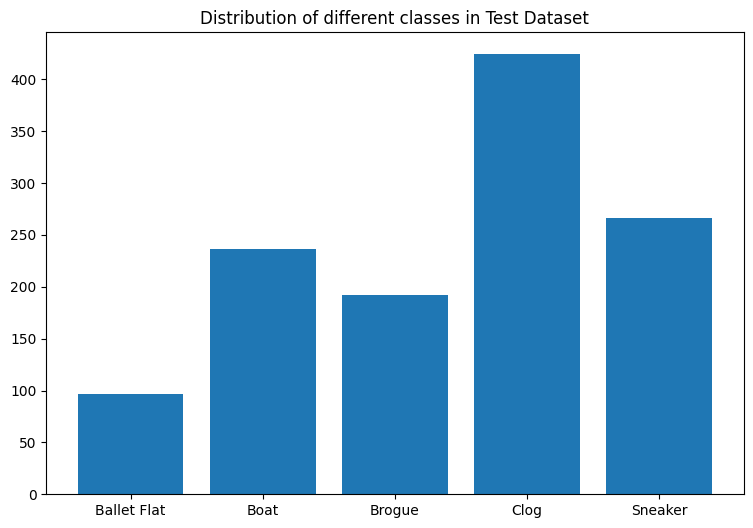

In [9]:
image_folder = ['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/data/test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

### *Modelo*

In [10]:
img_height = 244
img_width = 244

In [11]:
from keras import models
from keras import layers

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
 input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 242, 242, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 240, 240, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 120, 120, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 118, 118, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 116, 116, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 58, 58, 128)       0         
 g2D)                                                 

### *Explicación del Modelo*

1. **Capa Conv2D (64 filtros, tamaño del kernel 3x3, activación ReLU):**
   - Esta es la primera capa convolucional. La función Conv2D realiza convoluciones en la imagen de entrada con 64 filtros (también llamados kernels) de tamaño 3x3. La función de activación ReLU (Rectified Linear Unit) se aplica después de cada convolución para introducir no linealidades en la red.


2. **Capa Conv2D (64 filtros, tamaño del kernel 3x3, activación ReLU):**
   - Otra capa convolucional similar a la anterior con 64 filtros y activación ReLU.


3. **Capa MaxPooling2D (tamaño de la ventana 2x2):**
   - La capa de MaxPooling2D realiza un muestreo máximo para reducir las dimensiones espaciales de la representación, lo que ayuda a reducir la cantidad de parámetros y computación en la red. En este caso, se utiliza una ventana de 2x2.


4. **Capa Conv2D (128 filtros, tamaño del kernel 3x3, activación ReLU):**
   - Otra capa convolucional con 128 filtros y activación ReLU.


5. **Capa Conv2D (128 filtros, tamaño del kernel 3x3, activación ReLU):**
   - Otra capa convolucional similar a la anterior con 128 filtros y activación ReLU.


6. **Capa MaxPooling2D (tamaño de la ventana 2x2):**
   - Otra capa de MaxPooling2D para reducir las dimensiones espaciales.


7. **Capa Conv2D (256 filtros, tamaño del kernel 3x3, activación ReLU):**
   - Una tercera capa convolucional con 256 filtros y activación ReLU.


8. **Capa MaxPooling2D (tamaño de la ventana 2x2):**
   - Otra capa de MaxPooling2D antes de la capa de aplanado.


9. **Capa Flatten:**
   - Esta capa aplana la salida de la capa anterior, convirtiendo los mapas de características en un vector unidimensional. Es necesario antes de pasar a las capas totalmente conectadas.


10. **Capa Dropout (tasa de abandono de 0.5):**
    - La capa Dropout apaga aleatoriamente un porcentaje de unidades durante el entrenamiento (en este caso, el 50% de las unidades) para prevenir el sobreajuste.


11. **Capa Dense (512 unidades, activación ReLU):**
    - Capa totalmente conectada con 512 unidades y activación ReLU.


12. **Capa Dense (5 unidades, activación softmax):**
    - Capa de salida con 5 unidades (asumiendo un problema de clasificación con 5 clases) y activación softmax, que produce una distribución de probabilidad sobre las clases.
    

### Visualización del Modelo
[Se guarda como .png]

In [34]:
visualizer(model, file_format='png')

### *Entrenamiento*

In [13]:
model.compile(loss='categorical_crossentropy',
     optimizer='adam',
     metrics='accuracy')

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=20,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 val_dir,
 target_size=(img_height, img_width),
 batch_size=20,
 class_mode='categorical')

Found 3620 images belonging to 5 classes.
Found 3549 images belonging to 5 classes.


In [15]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 43s 239ms/step - loss: 1.7878 - accuracy: 0.2420 - val_loss: 1.6138 - val_accuracy: 0.2120
Epoch 2/30
100/100 [==============================] - 22s 215ms/step - loss: 1.5280 - accuracy: 0.2810 - val_loss: 1.5101 - val_accuracy: 0.3290
Epoch 3/30
100/100 [==============================] - 24s 243ms/step - loss: 1.4846 - accuracy: 0.3235 - val_loss: 1.5725 - val_accuracy: 0.2740
Epoch 4/30
100/100 [==============================] - 25s 247ms/step - loss: 1.4508 - accuracy: 0.3580 - val_loss: 1.5293 - val_accuracy: 0.3030
Epoch 5/30
100/100 [==============================] - 23s 224ms/step - loss: 1.4314 - accuracy: 0.3600 - val_loss: 1.4477 - val_accuracy: 0.3500
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 1.3435 - accuracy: 0.4445 - val_loss: 1.3824 - val_accuracy: 0.4140
Epoch 7/30
100/100 [==============================] - 25s 246ms/step - loss: 1.2881 - accuracy: 0.4640 - val_loss: 1.3115 - val_ac

### *Resultados*

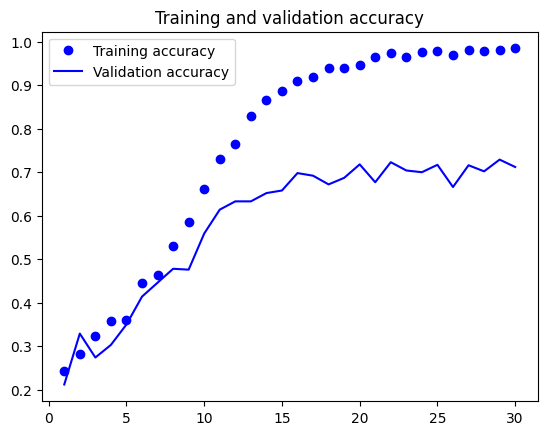

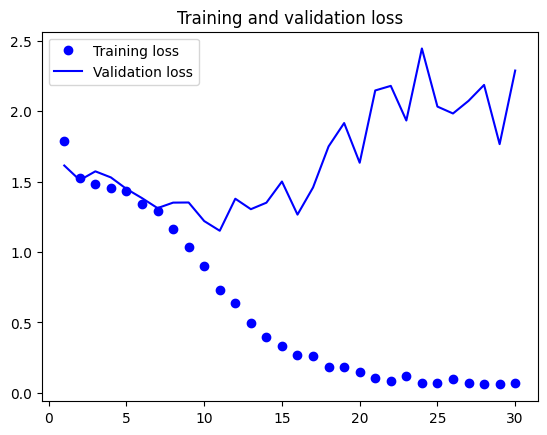

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### *Evaluación con la data de Test*

In [23]:
test_data = '/content/data/test/'

In [25]:
# Crea un generador de flujo de datos para las imágenes de prueba
test_datagen = ImageDataGenerator(rescale=1./244)

In [26]:
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_height, img_width),
    batch_size=20,
    class_mode='categorical'
)

Found 1215 images belonging to 5 classes.


In [27]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

61/61 [==============================] - 5s 80ms/step - loss: 5.3915 - accuracy: 0.4041
Test Accuracy: 0.404115229845047
Test Loss: 5.391524791717529


### *Resultados*

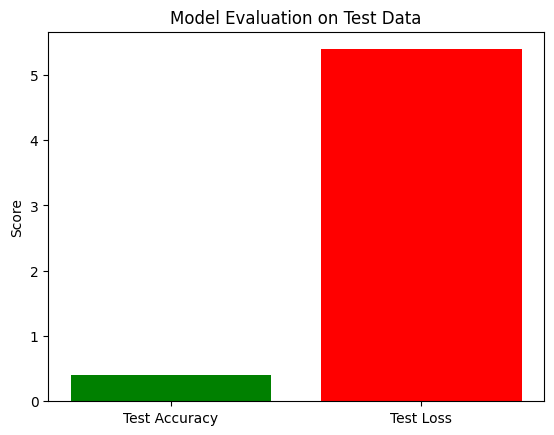

In [36]:
plt.bar(['Test Accuracy', 'Test Loss'], [test_accuracy, test_loss], color=['green', 'red'])
plt.ylabel('Score')
plt.title('Model Evaluation on Test Data')
plt.show()